                     wave  stfips  st      recnumbr repdate         dob  \
0  Age 17 Baseline Survey  Alaska  AK  450290395006  201103  1993-10-15   
1  Age 17 Baseline Survey  Alaska  AK  450448396586  201103  1993-12-15   
2  Age 17 Baseline Survey  Alaska  AK  450461296715  201103  1993-10-15   
3  Age 17 Baseline Survey  Alaska  AK  450540097503  201103  1993-10-15   
4  Age 17 Baseline Survey  Alaska  AK  450652098623  201103  1994-02-15   

      sex amiakn asian blkafram       ...       baseline fy11cohort elig19  \
0  female     no    no       no       ...            yes        yes    yes   
1  female    yes    no       no       ...            yes        yes    yes   
2  female     no    no       no       ...            yes         no     no   
3  female     no    no       no       ...            yes        yes    yes   
4    male     no    no       no       ...            yes        yes    yes   

  elig21 samplestate insample responded                              race  \
0  

wave           category
stfips         category
st               object
recnumbr         object
repdate          object
dob              object
sex            category
amiakn         category
asian          category
blkafram       category
hawaiipi       category
white          category
raceunkn       category
racedcln       category
hisorgin       category
outcmrpt       category
outcmdte         object
outcmfcs       category
currfte        category
currpte        category
emplysklls     category
socsecrty      category
educaid        category
pubfinas       category
pubfoodas      category
pubhousas      category
othrfinas      category
highedcert     category
currenroll     category
cnctadult      category
homeless       category
subabuse       category
incarc         category
children       category
marriage       category
medicaid       category
othrhlthin     category
medicalin      category
mentlhlthin    category
prescripin     category
baseline       category
fy11cohort     c

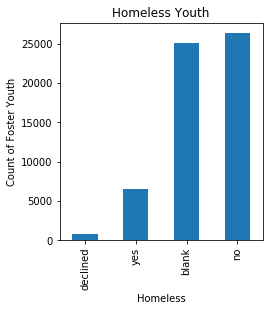

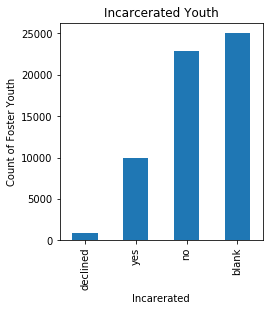

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

df = pd.read_stata('~/desktop/foster.dta')

print(df.head())

df.info()

print(df.describe())

print(df.shape)

print(df['homeless'].describe())

temp1 = df['homeless'].value_counts(ascending=True)
temp2 = df.pivot_table(values='incarc',index='homeless',aggfunc=lambda x: x.map({'Yes':1,'No':0}).mean())
print('Frequency Table of Homeless Incarcerated')
print(temp1)
print('\nProbability of being Homeless and Incarcerated')
print(temp2)

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Homeless')
ax1.set_ylabel('Count of Foster Youth')
ax1.set_title("Homeless Youth")
temp1.plot(kind='bar')

temp3 = df['incarc'].value_counts(ascending=True)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Incarerated')
ax1.set_ylabel('Count of Foster Youth')
ax1.set_title("Incarcerated Youth")
temp3.plot(kind='bar')

df.apply(lambda x: sum(x.isnull()),axis=0)

df.dtypes





In [56]:
df_cat = pd.DataFrame()
cat_var = ['sex','amiakn','asian','blkafram','hawaiipi','white','raceunkn','racedcln',
           'hisorgin','race','raceethn','wave']
for i in cat_var:
    df_cat[i] = df_all[i].cat.codes
print(df_cat.head())

   sex  amiakn  asian  blkafram  hawaiipi  white  raceunkn  racedcln  \
0    1       0      0         0         0      1         0         0   
1    1       1      0         0         0      0         0         0   
2    1       0      0         0         0      1         0         0   
3    1       0      0         0         0      1         0         0   
4    0       0      0         0         0      1         0         0   

   hisorgin  currfte     ...      cnctadult  homeless  subabuse  incarc  \
0         0        0     ...              1         0         1       0   
1         0        0     ...              1         0         0       0   
2         0        1     ...              1         1         1       1   
3         0        0     ...              1         1         0       0   
4         0        0     ...              1         1         0       1   

   children  marriage  medicaid  othrhlthin  medicalin  prescripin  
0         0         0         1           0    

In [62]:
df.describe()

,wave,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,blkafram,...,baseline,fy11cohort,elig19,elig21,samplestate,insample,responded,race,raceethn,stfcid
count,58729,58729,58729,58729,58729,58729,58654,58729,58729,58729,...,58729,58729,58729,14028,58729,39492,58729,58729,58729,58729
unique,3,52,52,30009,8,42,2,3,3,3,...,2,2,2,2,2,2,2,7,8,30009
top,Age 17 Baseline Survey,California,CA,ÂªÂ¡Â¬Â½Â¶Â¿ÂºÂ»Â«Â¾Â¿Ãº,201109,1994-07-15,male,no,no,no,...,yes,yes,yes,yes,no,no,yes,White,"Non-Hispanic (NH), White",MN1IJ6RKHJS0OB
freq,29104,8754,8754,3,14405,5298,30524,56781,57816,37733,...,57824,45222,34919,11471,37555,31399,33580,31176,25188,3


In [79]:
df_out = pd.read_stata('~/Desktop/foster_outcome.dta')

print(df_out.head(5))

                     wave          stfcid  stfips  st      recnumbr repdate  \
0  Age 17 Baseline Survey  AL000000007183       1  AL  000000007183  201403   
1  Age 17 Baseline Survey  AL000000038434       1  AL  000000038434  201409   
2  Age 17 Baseline Survey  AL000000046332       1  AL  000000046332  201403   
3  Age 17 Baseline Survey  AL000000059581       1  AL  000000059581  201403   
4  Age 17 Baseline Survey  AL000000121244       1  AL  000000121244  201409   

          dob     sex amiakn asian    ...    othrhlthin       medicalin  \
0  1996-10-15  female     no    no    ...            no             yes   
1  1997-05-15    male     no    no    ...            no             yes   
2  1996-10-15    male     no    no    ...            no  not applicable   
3  1996-11-15  female     no    no    ...         blank           blank   
4  1997-07-15  female     no    no    ...         blank           blank   

      mentlhlthin      prescripin baseline fy14cohort elig19 samplestate  

In [90]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df_tot = pd.read_csv('~/Desktop/foster_total.csv', low_memory=False)

df_tot

df_tot.shape

,wave,st,recnumbr,repdate,dob,sex,amiakn,asian,blkafram,hawaiipi,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 17 Baseline Survey,AK,4.5029E+11,201103,10/15/93,female,no,no,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
1,Age 17 Baseline Survey,AK,4.5029E+11,201103,10/15/93,female,no,no,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
2,Age 17 Baseline Survey,AK,4.5029E+11,201103,10/15/93,female,no,no,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",18
3,Age 17 Baseline Survey,AK,4.5029E+11,201103,10/15/93,female,no,no,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",19
4,Age 17 Baseline Survey,AK,4.5029E+11,201103,10/15/93,female,no,no,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",20
5,Age 17 Baseline Survey,AK,4.5029E+11,201103,10/15/93,female,no,no,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",21
6,Age 17 Baseline Survey,AK,4.50448E+11,201103,12/15/93,female,yes,no,no,no,...,No,No,No,No,No,No,Yes,AmInd / AK Native Only,"NH, AmInd / AK Native Only",17
7,Age 17 Baseline Survey,AK,4.50448E+11,201103,12/15/93,female,yes,no,no,no,...,No,No,No,No,No,No,No,AmInd / AK Native Only,"NH, AmInd / AK Native Only",17
8,Age 17 Baseline Survey,AK,4.50448E+11,201103,12/15/93,female,yes,no,no,no,...,No,No,No,No,No,No,Yes,AmInd / AK Native Only,"NH, AmInd / AK Native Only",18
9,Age 17 Baseline Survey,AK,4.50448E+11,201103,12/15/93,female,yes,no,no,no,...,No,No,No,No,No,No,No,AmInd / AK Native Only,"NH, AmInd / AK Native Only",18


(292116, 70)

In [81]:
df_serv = pd.read_stata('~/Desktop/foster_service.dta')

print(df_serv.head(5))

     fy  stfips  st repdate      recnumbr         dob     sex amiakn asian  \
0  2013       1  AL  201309  000000009831  1998-07-15  Female     No    No   
1  2014       1  AL  201409  000000009831  1998-07-15  Female     No    No   
2  2015       1  AL  201509  000000009831  1998-07-15  Female     No    No   
3  2011       1  AL  201109  000000014871  1996-08-15  Female     No    No   
4  2012       1  AL  201209  000000014871  1996-08-15  Female     No    No   

  blkafram  ...  famsuppsv mentorsv silsv rmbrdfasv educfinasv othrfinasv  \
0       No  ...        Yes       No    No        No         No         No   
1       No  ...        Yes       No    No        No         No         No   
2       No  ...        Yes       No    No        No         No         No   
3      Yes  ...         No       No    No        No         No         No   
4      Yes  ...         No       No    No        No         No         No   

           stfcid        race        raceethn agemp  
0  AL000000009

In [92]:
df_fost = pd.read_stata("~/Desktop/foster.dta")

df_fost

,wave,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,blkafram,...,baseline,fy11cohort,elig19,elig21,samplestate,insample,responded,race,raceethn,stfcid
0,Age 17 Baseline Survey,Alaska,AK,450290395006,201103,1993-10-15,female,no,no,no,...,yes,yes,yes,NaN,no,NaN,yes,White,"Non-Hispanic (NH), White",AK450290395006
1,Age 17 Baseline Survey,Alaska,AK,450448396586,201103,1993-12-15,female,yes,no,no,...,yes,yes,yes,NaN,no,NaN,yes,American Indian or Alaska Native,"NH, Am Ind AK Native",AK450448396586
2,Age 17 Baseline Survey,Alaska,AK,450461296715,201103,1993-10-15,female,no,no,no,...,yes,no,no,NaN,no,NaN,yes,White,"Non-Hispanic (NH), White",AK450461296715
3,Age 17 Baseline Survey,Alaska,AK,450540097503,201103,1993-10-15,female,no,no,no,...,yes,yes,yes,NaN,no,NaN,yes,White,"Non-Hispanic (NH), White",AK450540097503
4,Age 17 Baseline Survey,Alaska,AK,450652098623,201103,1994-02-15,male,no,no,no,...,yes,yes,yes,NaN,no,NaN,yes,White,"Non-Hispanic (NH), White",AK450652098623
5,Age 17 Baseline Survey,Alaska,AK,450660898711,201103,1993-12-15,male,yes,no,no,...,yes,no,no,NaN,no,NaN,yes,American Indian or Alaska Native,"NH, Am Ind AK Native",AK450660898711
6,Age 17 Baseline Survey,Alaska,AK,451448406587,201109,1994-05-15,female,yes,no,no,...,yes,yes,yes,NaN,no,NaN,yes,American Indian or Alaska Native,"NH, Am Ind AK Native",AK451448406587
7,Age 17 Baseline Survey,Alaska,AK,451453006633,201103,1994-02-15,male,no,no,no,...,yes,yes,yes,NaN,no,NaN,yes,White,Hispanic (Any Race),AK451453006633
8,Age 17 Baseline Survey,Alaska,AK,451560107704,201103,1994-03-15,male,yes,no,no,...,yes,yes,yes,NaN,no,NaN,yes,More Than One Race,"NH, More than One Race",AK451560107704
9,Age 17 Baseline Survey,Alaska,AK,451586507968,201103,1993-10-15,female,no,no,yes,...,yes,yes,yes,NaN,no,NaN,yes,Black or African American,"NH, Black",AK451586507968


In [119]:
del df_fost['stfips']
del df_fost['fy11cohort']
del df_fost['elig21']
del df_fost['race']
del df_fost['raceethn']
del df_out['stfips']
del df_out['fy14cohort']
del df_serv['st']
del df_serv['repdate']
del df_serv['recnumbr']
del df_serv['dob']
del df_serv['sex']
del df_serv['amiakn']
del df_serv['blkafram']
del df_serv['hawaiipi']
del df_serv['white']
del df_serv['raceunkn']
del df_serv['racedcln']
del df_serv['hisorgin']
del df_serv['asian']

In [120]:
frames = [df_fost,df_out]
df_com = pd.concat(frames)

df_com
df_com.shape

df_all = df_com.set_index('stfcid').join(df_serv.set_index('stfcid'), lsuffix='_df_com', 
                                rsuffix='_df_serv')

df_all
df_all.shape


,amiakn,asian,baseline,blkafram,children,cnctadult,currenroll,currfte,currpte,dob,...,repdate,responded,samplestate,sex,socsecrty,st,stfcid,subabuse,wave,white
0,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,201103,yes,no,female,yes,AK,AK450290395006,yes,Age 17 Baseline Survey,yes
1,yes,no,yes,no,no,yes,yes,no,no,1993-12-15,...,201103,yes,no,female,no,AK,AK450448396586,no,Age 17 Baseline Survey,no
2,no,no,yes,no,yes,yes,yes,yes,yes,1993-10-15,...,201103,yes,no,female,yes,AK,AK450461296715,yes,Age 17 Baseline Survey,yes
3,no,no,yes,no,no,yes,yes,no,yes,1993-10-15,...,201103,yes,no,female,yes,AK,AK450540097503,no,Age 17 Baseline Survey,yes
4,no,no,yes,no,no,yes,yes,no,no,1994-02-15,...,201103,yes,no,male,no,AK,AK450652098623,no,Age 17 Baseline Survey,yes
5,yes,no,yes,no,yes,yes,yes,yes,yes,1993-12-15,...,201103,yes,no,male,yes,AK,AK450660898711,yes,Age 17 Baseline Survey,no
6,yes,no,yes,no,no,yes,yes,no,no,1994-05-15,...,201109,yes,no,female,no,AK,AK451448406587,no,Age 17 Baseline Survey,no
7,no,no,yes,no,no,yes,yes,no,declined,1994-02-15,...,201103,yes,no,male,declined,AK,AK451453006633,yes,Age 17 Baseline Survey,yes
8,yes,no,yes,no,no,yes,yes,no,no,1994-03-15,...,201103,yes,no,male,no,AK,AK451560107704,no,Age 17 Baseline Survey,yes
9,no,no,yes,yes,no,yes,yes,no,no,1993-10-15,...,201103,yes,no,female,no,AK,AK451586507968,yes,Age 17 Baseline Survey,no


(98991, 45)

,amiakn,asian,baseline,blkafram,children,cnctadult,currenroll,currfte,currpte,dob,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
stfcid,,,,,,,,,,,,,,,,,,,,,
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",18
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",19
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,No,White Only,"NH, White Only",20
AK450290395006,no,no,yes,no,no,yes,yes,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",21
AK450290395006,no,no,yes,no,no,yes,no,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
AK450290395006,no,no,yes,no,no,yes,no,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",17
AK450290395006,no,no,yes,no,no,yes,no,no,no,1993-10-15,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",18


(328428, 69)

In [141]:
df_all.dtypes
missing = ['pubfoodas','pubhousas','racedcln','raceunkn','recnumbr','repdate','responded','samplestate','sex']
for i in missing:
    df_all[i].dtypes

amiakn         category
asian          category
baseline         object
blkafram       category
children       category
cnctadult      category
currenroll     category
currfte        category
currpte        category
dob              object
educaid        category
elig19         category
emplysklls     category
hawaiipi       category
highedcert     category
hisorgin         object
homeless       category
incarc         category
insample       category
marriage       category
medicaid       category
medicalin      category
mentlhlthin    category
othrfinas      category
othrhlthin       object
outcmdte         object
outcmfcs         object
outcmrpt       category
prescripin     category
pubfinas       category
                 ...   
socsecrty      category
st               object
subabuse       category
wave             object
white          category
fy              float64
stfips          float64
fcstatsv       category
lclfipssv      category
tribesv        category
delinqntsv     c

category

category

dtype('O')

category

dtype('O')

dtype('O')

category

category

category

In [147]:
df_all.isnull().sum()
for i in missing:
    df_all[i].isnull().sum()

amiakn         0
asian          0
baseline       0
blkafram       0
children       0
cnctadult      0
currenroll     0
currfte        0
currpte        0
dob            0
educaid        0
elig19         0
emplysklls     0
hawaiipi       0
highedcert     0
hisorgin       0
homeless       0
incarc         0
insample       0
marriage       0
medicaid       0
medicalin      0
mentlhlthin    0
othrfinas      0
othrhlthin     0
outcmdte       0
outcmfcs       0
outcmrpt       0
prescripin     0
pubfinas       0
              ..
socsecrty      0
st             0
subabuse       0
wave           0
white          0
fy             0
stfips         0
fcstatsv       0
lclfipssv      0
tribesv        0
delinqntsv     0
edlevlsv       0
specedsv       0
ilnasv         0
acsuppsv       0
psedsuppsv     0
careersv       0
emplytrsv      0
budgetsv       0
housedsv       0
hlthedsv       0
famsuppsv      0
mentorsv       0
silsv          0
rmbrdfasv      0
educfinasv     0
othrfinasv     0
race          

0

0

0

0

0

0

0

0

0

In [146]:
var = list(df_all.select_dtypes(include=["category"]))
for i in var:
    df_all[i] = df_all[i].cat.add_categories(["Zero"]).fillna("Zero")
na_var = ['hisorgin','othrhlthin','outcmfcs','fy','stfips']
for i in na_var:
    df_all[i]= df[i].fillna(0)

In [122]:
df_all.to_csv("~/Desktop/foster_all.csv")

In [91]:
df['homeless'].head(5)
df['blkafram']

0     no
1     no
2    yes
3    yes
4    yes
Name: homeless, dtype: category
Categories (4, object): [no < yes < declined < blank]

0         no
1         no
2         no
3         no
4         no
5         no
6         no
7         no
8         no
9        yes
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19        no
20       yes
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
58699     no
58700     no
58701     no
58702     no
58703     no
58704     no
58705     no
58706     no
58707     no
58708     no
58709     no
58710     no
58711     no
58712     no
58713     no
58714    yes
58715     no
58716     no
58717     no
58718     no
58719     no
58720     no
58721     no
58722     no
58723     no
58724     no
58725     no
58726     no
58727     no
58728     no
Name: blkafram, Length: 58729, dtype: category
Categories (3, object): [no < yes < Unknown]

In [ ]:
df_prep = pd.DataFrame()

non_var = ['stfcid','dob','elig19','insample','outcmdte','recnumber',
           'responded','samplestate','st','fy','stfips','agemp']

var_list = ['children','cntcadult','currenroll','currfte','currpte','educaid','emplysklls',
            'highedcert','homeless','incarc','marriage','medicaid','medicalin',
            'mentalhlthin','othrfinas','othrhlthin','outcmfcs','outcmrpt','prescripin',
            'pubfinas','pubfoodas','pubhousas','socsecrty','subabuse','fcstatsv',
            'lclfipssv','tribesv','delinqntsv','edlevlsv','specedsv','ilnasv','acsuppsv',
            'psedsuppsv','careersv','emplytrsv','budgetsv','housedsv','hlthedsv',
            'famsuppsv','mentorsv'],'silsv','rmbrdasv','educfinasv','othrfinasv']

var_list_1 = ['currfte','currpte','emplysklls','socsecrty','educaid','pubfinas',
           'pubfoodas','pubhousas','othrfinas','currenroll','cnctadult',
           'homeless','subabuse','incarc','children','marriage','medicaid','othrhlthin',
           'medicalin','prescripin']
var_list_2 = ['highedcert']
var_list_3 = ['currfte','currpte','emplysklls','socsecrty','educaid','pubfinas',
           'pubfoodas','pubhousas','othrfinas','currenroll','cnctadult',
           'homeless','subabuse','incarc','children','marriage','medicaid','othrhlthin',
           'medicalin','prescripin']
var_list_4 = ['outcmrpt']
dat_dic_1 = dict({'no':3, 'yes':0, 'unknown':1, 'decline':1, 'blank':1,'do not know':1, 
                'NA':1, 'not applicable':1, 'Zero':0})
dat_dic_2 = dict({'none of the above':0, 'vocational license':5, 
                'vocational certificate':5,'higher degree':5,'associate degree':5,
                'bachelor degree':5,'high school or ged':3, 'Zero':0})
dat_dic_3 = dict({'no':0, 'yes':3,'unknown':1, 'decline':1, 'blank':1,'do not know':1, 
                'NA':1, 'not applicable':1, 'Zero':0})
dat_dic_4 = dict({'blank':1,'death':0,'incarcerated':0,'runaway or missing':0,
                  'incapacitated':0,'unable to locate':1,'declined':1'not in sample':1,
                  'parent declined':1,'participated':3,'NA':1, 'Zero':0})